In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### **EDA**

In [ ]:
aggr_url = '/content/drive/MyDrive/DA_VERAXEN_test/ecpm_aggr.csv'
df_aggr = pd.read_csv(aggr_url, parse_dates=['date'])
df_aggr = df_aggr.drop('Unnamed: 0', axis=1)

In [ ]:
df_aggr

,ecpm_value,date,app,country,ecpm_type
0,0.757282,2021-06-04 13:30:27.883259,awesome app A,US,banner
1,0.788831,2021-06-05 13:30:27.883259,awesome app A,US,banner
2,0.796442,2021-06-06 13:30:27.883259,awesome app A,US,banner
3,0.807773,2021-06-07 13:30:27.883259,awesome app A,US,banner
4,0.747525,2021-06-08 13:30:27.883259,awesome app A,US,banner
...,...,...,...,...,...
6115,9.126382,2021-08-28 13:30:27.883259,brilliant app B,ES,interstitial
6116,9.451709,2021-08-29 13:30:27.883259,brilliant app B,ES,interstitial
6117,8.875883,2021-08-30 13:30:27.883259,brilliant app B,ES,interstitial
6118,8.879324,2021-08-31 13:30:27.883259,brilliant app B,ES,interstitial


In [ ]:
df_aggr.ecpm_value.describe()

count    6120.000000
mean        5.410784
std         4.756485
min         0.565524
25%         0.726088
50%         4.446867
75%        10.406331
max        11.745950
Name: ecpm_value, dtype: float64

In [ ]:
print(df_aggr.date.min())
print(df_aggr.date.max())

2021-06-04 13:30:27.883259
2021-09-01 13:30:27.883259


In [ ]:
df_aggr.date = df_aggr.date.dt.date

In [ ]:
df_aggr.isna().sum()

ecpm_value    0
date          0
app           0
country       0
ecpm_type     0
dtype: int64

In [ ]:
df_aggr.nunique()

ecpm_value    6120
date            90
app              2
country         17
ecpm_type        2
dtype: int64

In [ ]:
url_event = '/content/drive/MyDrive/DA_VERAXEN_test/events_data.csv'
event_df = pd.read_csv(url_event, parse_dates=['date'])
event_df = event_df.drop('Unnamed: 0', axis=1)

In [ ]:
event_df

,date,app,version,network,event_type,installs,days_after_installs,country,events_amount
0,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0
1,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0
2,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0
3,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0
4,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0
...,...,...,...,...,...,...,...,...,...
835375,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,39,ES,1125075.0
835376,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,40,ES,1366665.0
835377,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,41,ES,1069572.0
835378,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,42,ES,1354628.0


In [ ]:
event_df.isna().sum()

date                   0
app                    0
version                0
network                0
event_type             0
installs               0
days_after_installs    0
country                0
events_amount          0
dtype: int64

In [ ]:
event_df.date = event_df.date.dt.date

In [ ]:
print(event_df.date.min())
print(event_df.date.max())

2021-06-04
2021-09-01


In [ ]:
event_df.nunique()

date                       90
app                         2
version                     4
network                     3
event_type                  2
installs                 7718
days_after_installs        90
country                    17
events_amount          669646
dtype: int64

**Преобразуем date в cohort_date (данный столбец будет идентифицировать когорту), и добавим столбец res_date с датой event'ов**


In [ ]:
event_df = event_df.rename({'date':'cohort_date'}, axis=1)
event_df['res_date'] = pd.to_datetime(event_df.cohort_date).dt.date + pd.to_timedelta(event_df.days_after_installs, 'day')


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  PerformanceWarning,


In [ ]:
event_df

,cohort_date,app,version,network,event_type,installs,days_after_installs,country,events_amount,res_date
0,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0,2021-06-30
1,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0,2021-07-01
2,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0,2021-07-02
3,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0,2021-07-03
4,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0,2021-07-04
...,...,...,...,...,...,...,...,...,...,...
835375,2021-07-20,brilliant app B,2.2,AdNetwork S,banner,72281,39,ES,1125075.0,2021-08-28
835376,2021-07-20,brilliant app B,2.2,AdNetwork S,banner,72281,40,ES,1366665.0,2021-08-29
835377,2021-07-20,brilliant app B,2.2,AdNetwork S,banner,72281,41,ES,1069572.0,2021-08-30
835378,2021-07-20,brilliant app B,2.2,AdNetwork S,banner,72281,42,ES,1354628.0,2021-08-31


**Перед тем, как превратить event'ы в деньги применяя eCPM, проверим данные по eCPM на наличие аномалий.**

In [ ]:
df_aggr

,ecpm_value,date,app,country,ecpm_type
0,0.757282,2021-06-04,awesome app A,US,banner
1,0.788831,2021-06-05,awesome app A,US,banner
2,0.796442,2021-06-06,awesome app A,US,banner
3,0.807773,2021-06-07,awesome app A,US,banner
4,0.747525,2021-06-08,awesome app A,US,banner
...,...,...,...,...,...
6115,9.126382,2021-08-28,brilliant app B,ES,interstitial
6116,9.451709,2021-08-29,brilliant app B,ES,interstitial
6117,8.875883,2021-08-30,brilliant app B,ES,interstitial
6118,8.879324,2021-08-31,brilliant app B,ES,interstitial


In [ ]:
plt.rcParams["figure.figsize"] = (15,8)

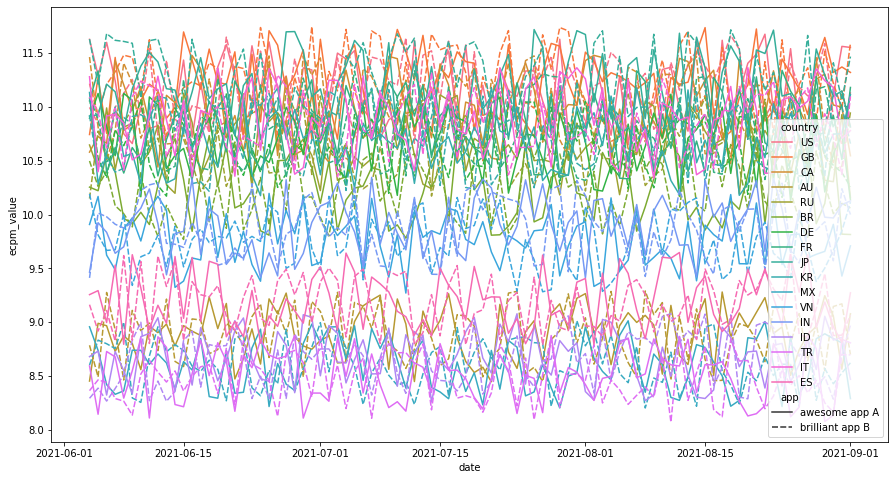

In [ ]:
sns.lineplot(data=df_aggr.query('ecpm_type != "banner"'), x="date", y="ecpm_value", hue="country", style="app")

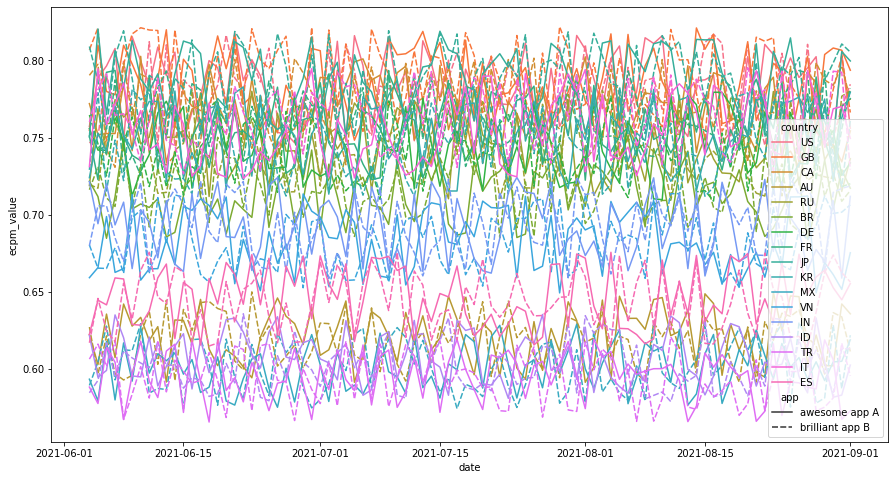

In [ ]:
sns.lineplot(data=df_aggr.query('ecpm_type == "banner"'), x="date", y="ecpm_value", hue="country", style="app")

**Визуально явно сильных отклонений в значениях eCPM нет.** 
**Добавим в таблицу event'ов данные по соответствующим eCPM.**

In [ ]:
event_df = event_df.merge(df_aggr, how='left', left_on=['app','country','event_type','res_date'],
                                               right_on=['app','country','ecpm_type','date'])\
                    .drop(['date', 'ecpm_type'], axis = 1)

In [ ]:
event_df['daily_ARPU'] = event_df.events_amount*event_df.ecpm_value/(1000*event_df.installs)

In [ ]:
event_df.to_csv('/content/drive/MyDrive/DA_VERAXEN_test/daily_ARPU_event.csv')

In [ ]:
event_df

,cohort_date,app,version,network,event_type,installs,days_after_installs,country,events_amount,res_date,ecpm_value,daily_ARPU
0,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0,2021-06-30,11.344681,0.089569
1,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0,2021-07-01,10.696771,0.089232
2,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0,2021-07-02,11.071604,0.075633
3,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0,2021-07-03,11.500480,0.085592
4,2021-06-30,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0,2021-07-04,11.446152,0.070262
...,...,...,...,...,...,...,...,...,...,...,...,...
835375,2021-07-20,brilliant app B,2.2,AdNetwork S,banner,72281,39,ES,1125075.0,2021-08-28,0.636744,0.009911
835376,2021-07-20,brilliant app B,2.2,AdNetwork S,banner,72281,40,ES,1366665.0,2021-08-29,0.662449,0.012525
835377,2021-07-20,brilliant app B,2.2,AdNetwork S,banner,72281,41,ES,1069572.0,2021-08-30,0.673848,0.009971
835378,2021-07-20,brilliant app B,2.2,AdNetwork S,banner,72281,42,ES,1354628.0,2021-08-31,0.662416,0.012414


**Постоим датафрейм с дневным ARPU для когорт**

In [ ]:
dARPU_df = event_df.drop(['installs', 'events_amount', 'ecpm_value'], axis = 1)

In [ ]:
dARPU_df = dARPU_df.groupby(['cohort_date', 'days_after_installs'], as_index=False).agg({'daily_ARPU' : 'sum'})

In [ ]:
coh_ARPU_df = dARPU_df.pivot(index='cohort_date', columns='days_after_installs', values='daily_ARPU')

In [ ]:
#coh_ARPU_df = coh_ARPU_df[list(coh_ARPU_df.columns.values)[::-1]]
#coh_ARPU_df = coh_ARPU_df[::-1]

In [ ]:
coh_ARPU_df

days_after_installs,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
cohort_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-04,18.302736,16.846012,15.658077,14.387903,13.301918,12.273648,11.512300,10.573718,9.875626,8.944957,8.456737,7.807837,7.456530,6.775764,6.322137,5.870718,5.554756,5.216944,4.948055,4.814677,4.372397,4.189623,3.884279,3.672019,3.552188,3.463217,3.305103,3.228912,2.981841,2.798837,2.825837,2.741238,2.533974,2.519826,2.423444,2.343471,2.355644,2.258178,2.166058,2.144172,...,1.973098,1.837741,1.848381,1.806493,1.768496,1.772433,1.804281,1.770697,1.799390,1.632547,1.742212,1.813976,1.760486,1.685417,1.646129,1.731224,1.679315,1.740437,1.609241,1.660403,1.705962,1.728305,1.723928,1.765716,1.542550,1.633738,1.605950,1.769786,1.746966,1.751578,1.789676,1.588943,1.707269,1.771139,1.698212,1.519188,1.720956,1.750874,1.661954,1.687337
2021-06-05,18.165964,16.693102,15.341244,14.315458,13.164072,12.191744,11.098596,10.446452,9.422685,8.933319,8.305879,7.826246,7.216771,6.813520,6.408167,5.911424,5.526168,5.185858,4.912076,4.592219,4.388427,4.108087,3.923498,3.636236,3.461236,3.497408,3.250073,3.087359,3.058993,2.853709,2.736785,2.654789,2.683703,2.489817,2.452164,2.340087,2.285136,2.203103,2.156666,2.205907,...,1.814598,1.837716,1.738713,1.771876,1.730245,1.652125,1.866138,1.798562,1.675464,1.763670,1.691662,1.737173,1.586122,1.760815,1.654435,1.630682,1.584173,1.762745,1.758465,1.607956,1.683624,1.643047,1.594703,1.609920,1.649842,1.675248,1.611603,1.635530,1.537866,1.720988,1.581913,1.559710,1.638447,1.629175,1.582330,1.680773,1.736037,1.536416,1.704759,NaN
2021-06-06,18.146619,16.882645,15.510283,14.304847,13.333500,12.095123,11.544527,10.339665,9.839217,9.117500,8.395665,7.877943,7.348614,6.845531,6.280710,5.980034,5.609247,5.135098,5.046897,4.603228,4.433040,4.072444,4.018219,3.723775,3.573377,3.335393,3.260396,3.119193,3.018693,2.886535,2.723924,2.751688,2.547408,2.399333,2.348699,2.348104,2.288798,2.279735,2.174555,2.087233,...,1.785411,1.837093,1.846747,1.895323,1.686206,1.833800,1.638355,1.723706,1.749280,1.851989,1.715031,1.723114,1.846892,1.675547,1.790266,1.595147,1.732195,1.744517,1.658954,1.714037,1.624913,1.666755,1.815995,1.615587,1.615024,1.605245,1.836522,1.794941,1.746262,1.671904,1.707447,1.608517,1.540782,1.690054,1.716847,1.750963,1.683466,1.662491,NaN,NaN
2021-06-07,17.991364,16.510584,15.217029,13.998027,13.064782,11.966879,11.009096,10.257121,9.475994,8.719960,8.365561,7.638889,7.366887,6.733710,6.150268,5.811887,5.576532,5.108878,4.768628,4.494828,4.330722,4.024919,3.866020,3.628854,3.455512,3.301487,3.135306,3.024481,2.959072,2.846705,2.691395,2.561190,2.685306,2.502694,2.283646,2.332716,2.272855,2.297189,2.109870,2.074856,...,1.863600,1.867658,1.765337,1.690391,1.800599,1.844102,1.667297,1.693930,1.765126,1.756549,1.673674,1.558882,1.695372,1.747882,1.740988,1.755507,1.629875,1.709466,1.654660,1.756360,1.665858,1.776284,1.659914,1.691157,1.647997,1.654988,1.664944,1.679211,1.648548,1.695024,1.660269,1.614540,1.558960,1.634071,1.627488,1.564244,1.586860,NaN,NaN,NaN
2021-06-08,18.728635,17.077543,15.895583,14.664982,13.683294,12.520000,11.465315,10.695362,9.924715,9.188234,8.656463,7.934589,7.362585,7.145340,6.432814,5.981764,5.696996,5.386064,5.003925,4.724820,4.437408,4.234099,4.093353,3.823844,3.570055,3.562538,3.248477,3.256320,3.046155,2.961014,2.837193,2.560929,2.658741,2.669598,2.422799,2.392554,2.362719,2.325714,2.259392,2.137490,...,1.743845,2.021148,1.835227,1.897036,1.804617,1.824825,1.821706,1.814495,1.649483,1.743558,1.868316,1.701338,1.761686,1.756630,1.783587,1.787234,1.429809,1.717457,1.860856,1.651001,1.806303,1.745636,1.835137,1.790997,1.811315,1.723477,1.695063,1.751946,1.676726,1.774263,1.723618,1.743439,1.626996,1.776996,1.607741,1.685465,NaN,

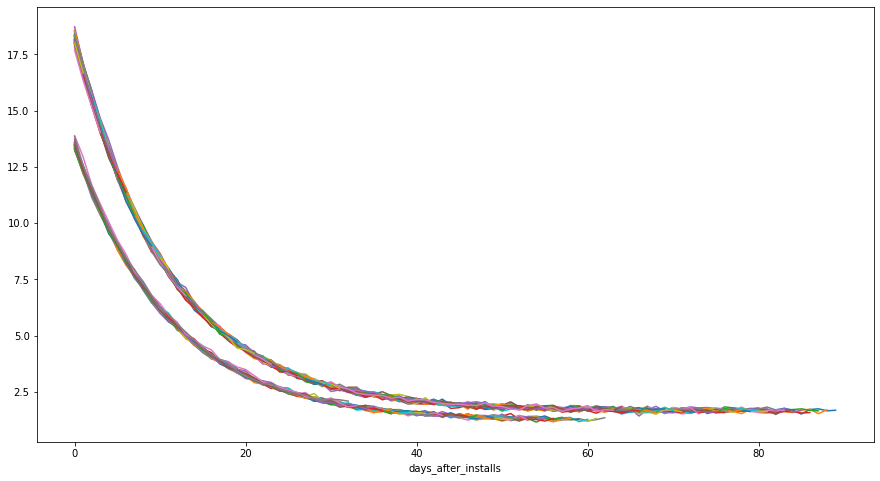

In [ ]:
coh_ARPU_df.T.plot(figsize = (15,8), legend=None)

**На графике явно виден провал дневного ARPU в некоторых когортах**

In [ ]:
cum_ARPU_df =  coh_ARPU_df.cumsum(axis=1)

In [ ]:
#cum_ARPU_df = cum_ARPU_df[list(cum_ARPU_df.columns.values)[::-1]]


In [ ]:
cum_ARPU_df

days_after_installs,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
cohort_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-04,18.302736,35.148747,50.806824,65.194727,78.496645,90.770294,102.282594,112.856312,122.731937,131.676895,140.133632,147.941468,155.397999,162.173763,168.495900,174.366618,179.921374,185.138318,190.086373,194.901051,199.273448,203.463071,207.347350,211.019369,214.571557,218.034774,221.339876,224.568788,227.550629,230.349465,233.175302,235.916540,238.450514,240.970340,243.393784,245.737255,248.092900,250.351077,252.517135,254.661308,...,276.625045,278.462786,280.311167,282.117660,283.886156,285.658589,287.462870,289.233567,291.032957,292.665504,294.407717,296.221693,297.982179,299.667596,301.313725,303.044948,304.724264,306.464701,308.073942,309.734345,311.440307,313.168612,314.892540,316.658256,318.200806,319.834544,321.440494,323.210280,324.957246,326.708825,328.498500,330.087443,331.794711,333.565851,335.264063,336.783251,338.504207,340.255081,341.917035,343.604372
2021-06-05,18.165964,34.859066,50.200310,64.515768,77.679840,89.871584,100.970180,111.416632,120.839316,129.772635,138.078515,145.904761,153.121532,159.935051,166.343218,172.254642,177.780809,182.966667,187.878743,192.470962,196.859389,200.967476,204.890974,208.527210,211.988446,215.485854,218.735927,221.823286,224.882279,227.735989,230.472774,233.127563,235.811266,238.301083,240.753247,243.093334,245.378470,247.581573,249.738239,251.944146,...,273.482494,275.320210,277.058923,278.830799,280.561044,282.213169,284.079307,285.877869,287.553333,289.317003,291.008665,292.745838,294.331960,296.092775,297.747210,299.377892,300.962065,302.724810,304.483274,306.091231,307.774855,309.417902,311.012605,312.622526,314.272368,315.947616,317.559219,319.194749,320.732615,322.453603,324.035516,325.595226,327.233673,328.862847,330.445177,332.125950,333.861987,335.398403,337.103162,NaN
2021-06-06,18.146619,35.029264,50.539547,64.844394,78.177894,90.273016,101.817543,112.157208,121.996425,131.113926,139.509591,147.387534,154.736148,161.581679,167.862389,173.842423,179.451669,184.586767,189.633663,194.236892,198.669932,202.742376,206.760595,210.484370,214.057747,217.393140,220.653536,223.772729,226.791422,229.677957,232.401881,235.153570,237.700977,240.100311,242.449010,244.797114,247.085913,249.365648,251.540203,253.627436,...,275.545490,277.382582,279.229330,281.124653,282.810859,284.644659,286.283014,288.006720,289.756000,291.607989,293.323021,295.046134,296.893027,298.568574,300.358840,301.953987,303.686181,305.430698,307.089652,308.803689,310.428602,312.095357,313.911352,315.526940,317.141964,318.747209,320.583731,322.378671,324.124934,325.796838,327.504285,329.112802,330.653583,332.343637,334.060484,335.811448,337.494914,339.157404,NaN,NaN
2021-06-07,17.991364,34.501948,49.718977,63.717004,76.781787,88.748666,99.757762,110.014883,119.490877,128.210837,136.576397,144.215286,151.582173,158.315883,164.466151,170.278037,175.854569,180.963447,185.732075,190.226904,194.557626,198.582545,202.448565,206.077419,209.532931,212.834418,215.969724,218.994205,221.953277,224.799982,227.491377,230.052568,232.737874,235.240568,237.524214,239.856929,242.129785,244.426974,246.536844,248.611701,...,269.474435,271.342093,273.107430,274.797821,276.598420,278.442522,280.109819,281.803748,283.568875,285.325423,286.999098,288.557980,290.253352,292.001234,293.742222,295.497729,297.127604,298.837070,300.491730,302.248090,303.913948,305.690232,307.350146,309.041303,310.689300,312.344288,314.009232,315.688443,317.336991,319.032014,320.692283,322.306823,323.865783,325.499854,327.127342,328.691586,330.278446,NaN,NaN,NaN
2021-06-08,18.728635,35.806179,51.701762,66.366744,80.050037,92.570037,104.035353,114.730715,124.655429,133.843664,142.500126,150.434715,157

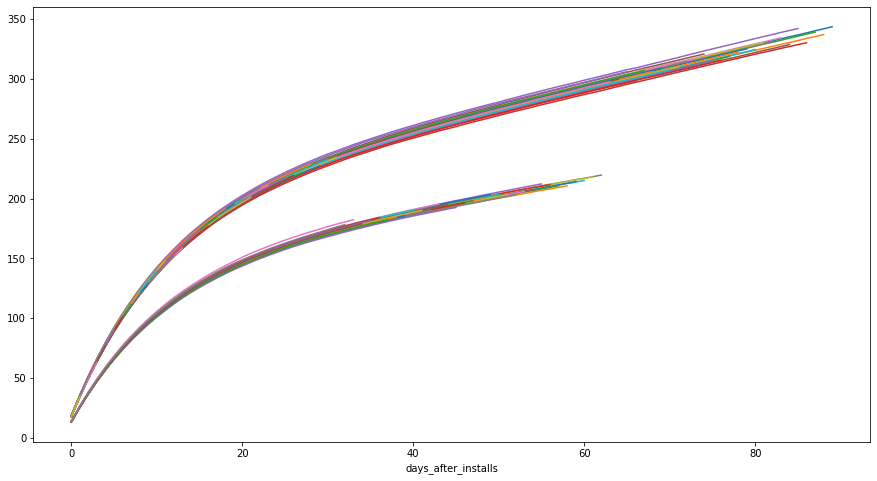

In [ ]:
cum_ARPU_df.T.plot(legend=None)


**График кулумятивного ARPU также показывает снижение для некоторых когорт**


**Для более комфортного отображения сформируем датафрейф для каждой пятой когорты с интервалом в 5 дней.**

In [ ]:
part_cARPU_df = cum_ARPU_df.iloc[::5,::5]

In [ ]:
part_cARPU_df

days_after_installs,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85
cohort_date,,,,,,,,,,,,,,,,,,
2021-06-04,18.302736,90.770294,140.133632,174.366618,199.273448,218.034774,233.175302,245.737255,256.871561,266.976519,276.625045,285.658589,294.407717,303.044948,311.440307,319.834544,328.498500,336.783251
2021-06-09,18.049231,89.106239,137.398303,171.366692,195.701582,214.519647,229.143602,241.521242,252.219216,261.977143,270.982991,280.060265,288.627885,297.030245,305.276797,313.810304,322.131855,NaN
2021-06-14,18.161800,90.608043,139.479008,173.697941,198.649923,217.420007,232.167659,244.697036,255.437736,265.432541,275.003361,284.029381,292.965845,301.806209,310.039253,318.366502,NaN,NaN
2021-06-19,18.557235,91.373878,140.831437,175.506350,200.608006,219.350805,234.492853,247.287941,258.809581,268.926351,278.387126,287.832353,296.840431,305.588362,314.037724,NaN,NaN,NaN
2021-06-24,18.332662,90.237538,139.191411,173.529645,198.268483,217.167878,232.344635,244.825844,256.067286,266.237036,275.690478,284.719981,293.417289,301.927057,NaN,NaN,NaN,NaN
2021-06-29,18.340261,90.755449,139.559592,173.687517,198.729220,217.587416,232.528271,245.038229,255.912491,265.937647,275.170046,284.231746,292.724938,NaN,NaN,NaN,NaN,NaN
2021-07-04,13.449300,66.508576,102.410498,127.470312,145.652731,159.620149,170.629780,179.962298,188.038812,195.157161,202.119295,208.944837,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-09,13.365918,66.339958,102.444158,127.424059,145.718342,159.486944,170.480211,179.819677,187.776025,195.321688,202.200005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-14,13.523119,67.165228,103.496502,129.004484,147.770609,161.758750,172.846081,181.979898,190.328988,197.904021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.rcParams["figure.figsize"] = (18,11)

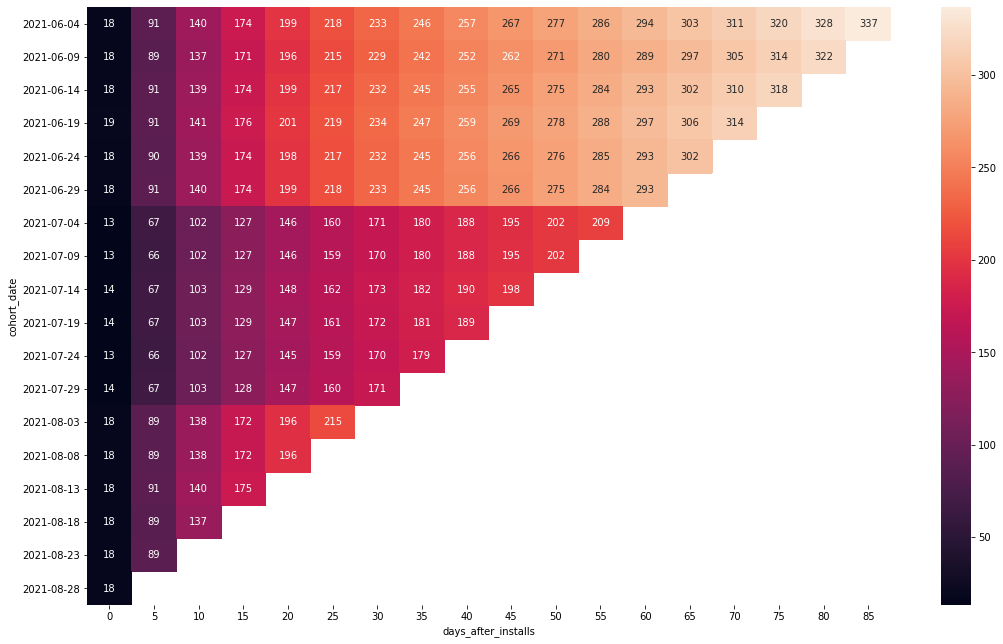

In [ ]:
sns.heatmap(week_cARPU_df, mask=week_cARPU_df.isnull(), annot=True, fmt = '.0f')

**На тепловой карте явно видно падение кумулятивного ARPU для когорт 07 месяца.**

Количество установок по всем каналам привлечения и странам резко не падало. При этом в данный период резко снизилось количество показов рекламы в приложении "awesome app A". При этом видно, что количество показов типа "interstitial" стабильно, а показы типа "banner" в данном периоде уменьшились на порядок. ***(Графики в Tableau)***

In [ ]:
event_df.groupby(['app', 'version'], as_index =False).agg({'cohort_date' : ['min', 'max']})

app version cohort_date            
                                   min         max
0    awesome app A     1.0  2021-06-04  2021-06-30
1    awesome app A     1.1  2021-07-01  2021-07-31
2    awesome app A     2.0  2021-08-01  2021-09-01
3  brilliant app B     2.0  2021-06-04  2021-07-19
4  brilliant app B     2.2  2021-07-20  2021-09-01

**ВЫВОДЫ**
- так как показы рекламы типа «banner» в версии 1.1 приложения «awesome app A» не прекратились полностью, вероятная проблема может крыться в местах показов рекламы данного типа в приложении. 
- так как даты инсталлов разных версий не пересекаются, можно предположить, что версия 1.1 была выпущена без проведения A/B-тестов.

**РЕКОМЕНДАЦИИ**
- при переходе на новые версии обязательно проводить A/B-тестирование;
- попробовать пропушить пользователей версии 1.1 приложения A с целью обновления до версии 2.0, так как даже приблизительная оценка разницы в показах начинается с 25.000 денежных единиц для каждой дневной когорты в период 01.07-31.07. Приблизительно такая же разница может оставаться  в горизонте не меньше одного месяца.